Concrete compressive strength dataset

Data Description:

The actual concrete compressive strength (MPa) for a given mixture under a
specific age (days) was determined from laboratory. Data is in raw form (not scaled).The data has 8 quantitative input variables, and 1 quantitative output variable, and 1030 instances (observations).

The concrete compressive strength is a highly nonlinear function of age and ingredients. These ingredients include cement, blast furnace slag, fly ash, water, superplasticizer, coarse aggregate, and fine aggregate.

Attribute Information:

● Cement : measured in kg in a m3 mixture
● Blast : measured in kg in a m3 mixture
● Fly ash : measured in kg in a m3 mixture
● Water : measured in kg in a m3 mixture
● Superplasticizer : measured in kg in a m3 mixture
● Coarse Aggregate : measured in kg in a m3 mixture
● Fine Aggregate : measured in kg in a m3 mixture
● Age : day (1~365)
● Concrete compressive strength measured in MPa

In [1]:
# Importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# read the given dataset and get a glance of first five records

data=pd.read_csv("concrete.csv",sep=",")
data.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [3]:
# get columns and data count

data.shape

(1030, 9)

In [4]:
# Dataset has 1030 rows and 9 columns
# Checking column data types

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement          1030 non-null float64
slag            1030 non-null float64
ash             1030 non-null float64
water           1030 non-null float64
superplastic    1030 non-null float64
coarseagg       1030 non-null float64
fineagg         1030 non-null float64
age             1030 non-null int64
strength        1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [5]:
# Checking the data description
data.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [6]:
# Getting number of unique data
data.apply(lambda x: len(x.unique()))

cement          278
slag            185
ash             156
water           195
superplastic    111
coarseagg       284
fineagg         302
age              14
strength        845
dtype: int64

In [7]:
# Having a different look at description by transposing
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


In [8]:
#checking for missing values in data

data.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

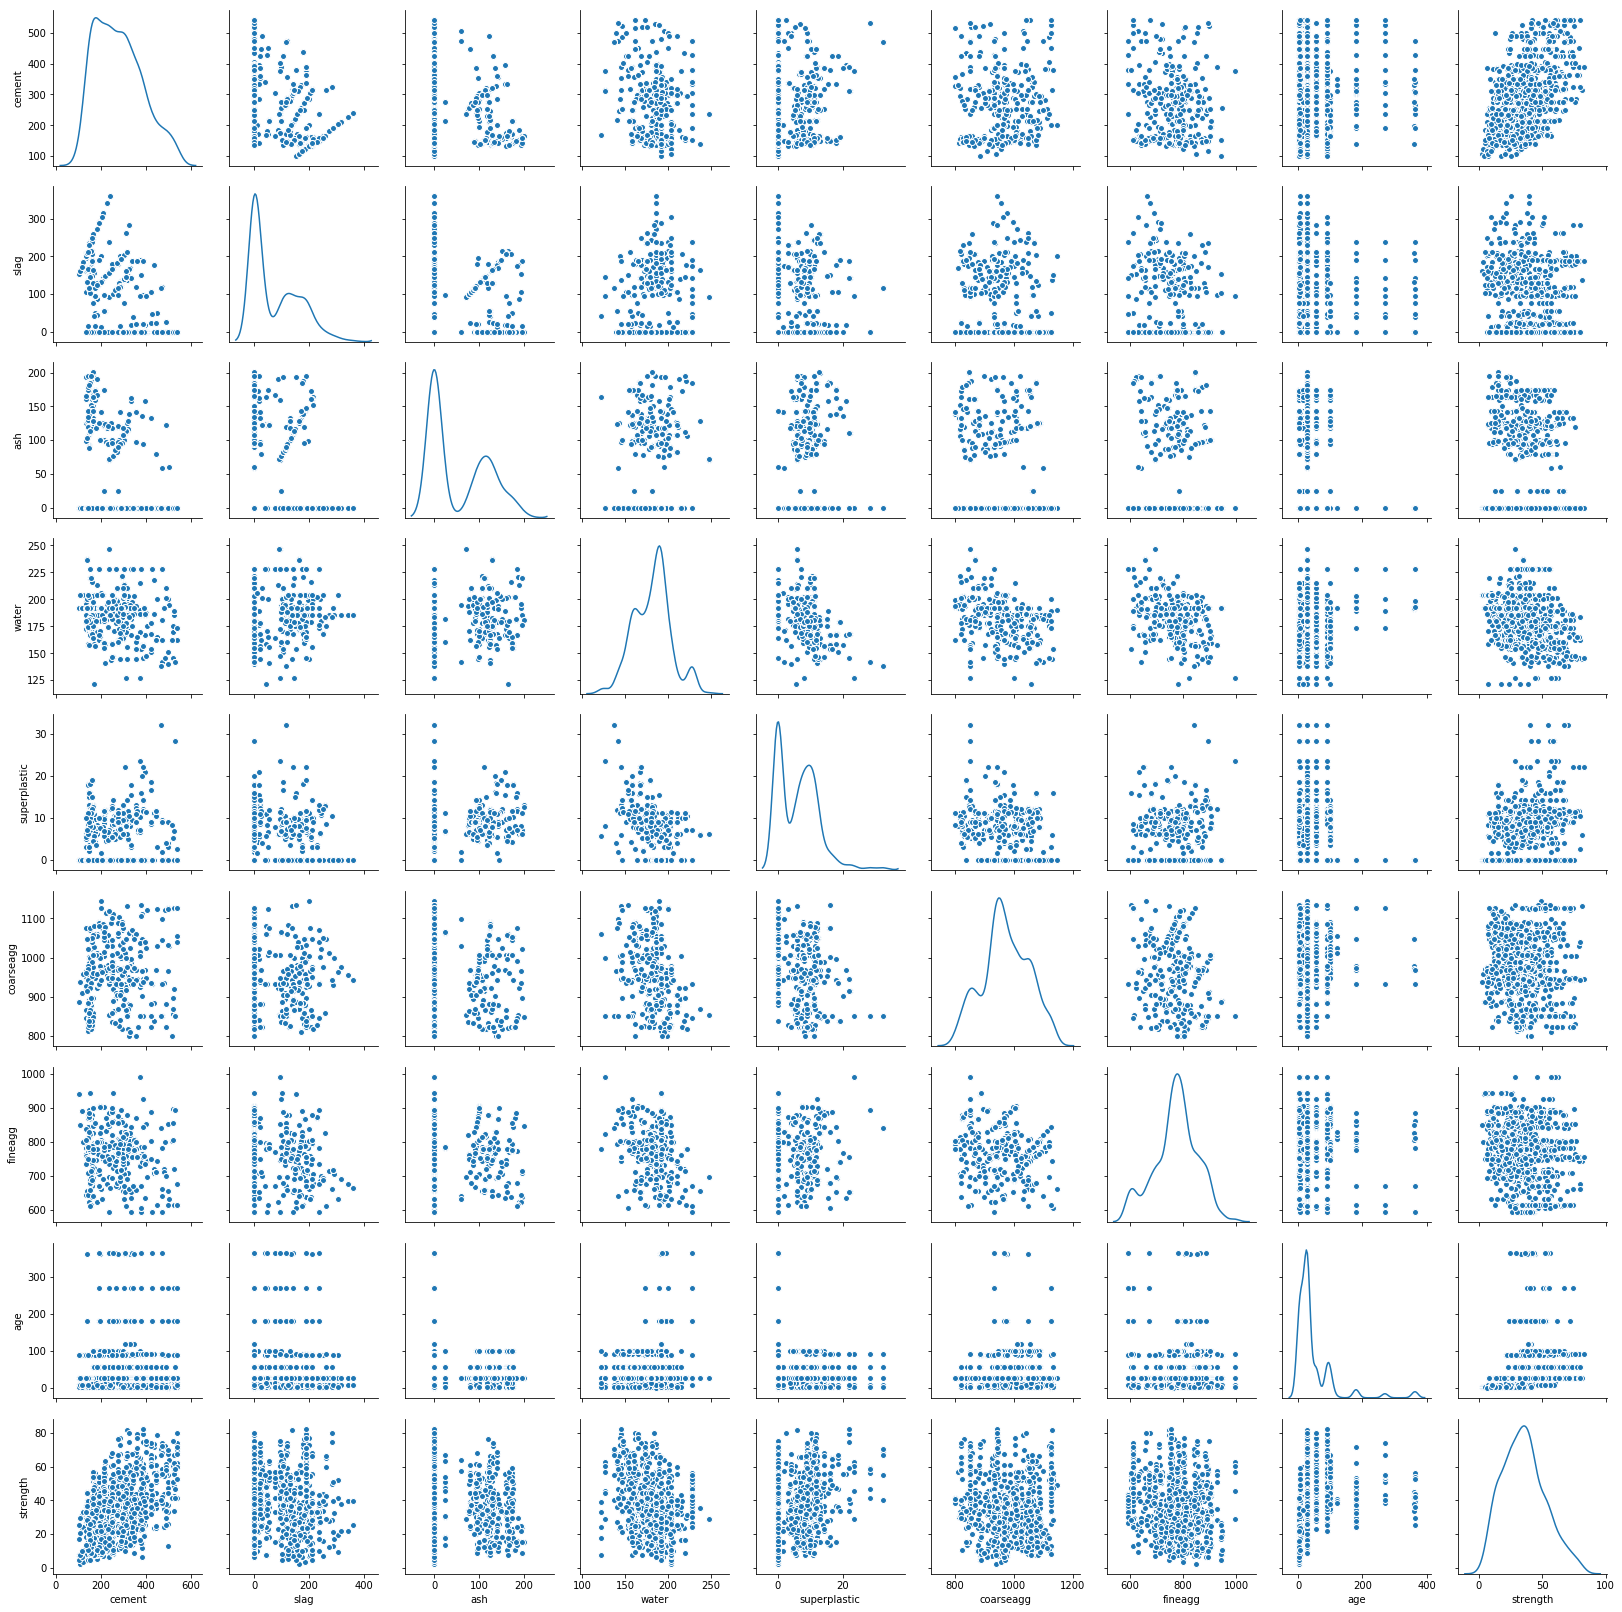

In [9]:
# We can see that there are no null or missing values in the dataset
# Pairplot using sns

sns.pairplot(data , diag_kind='kde')

Observations:

We see some features correlated, for example the water and coarse aggr. are negatively correlated showing that large water amount in concrete usually tend to small amount of coarse aggr. 

slag and ash may have exponential distribution

In [10]:
data.apply(lambda x: x.corr(data['strength']))

cement          0.497832
slag            0.134829
ash            -0.105755
water          -0.289633
superplastic    0.366079
coarseagg      -0.164935
fineagg        -0.167241
age             0.328873
strength        1.000000
dtype: float64

Observations:
We can see that the features that are most correlated with the target variable 'strength' are:

age
cement
superplastic
slag

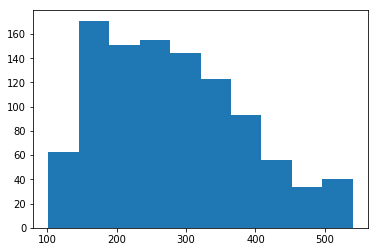

In [12]:
plt.hist(data['cement'])
plt.show()

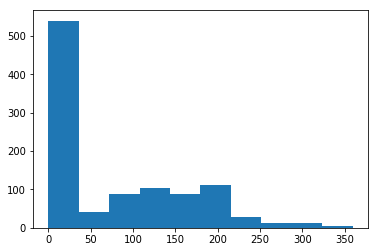

In [13]:
plt.hist(data['slag'])
plt.show()

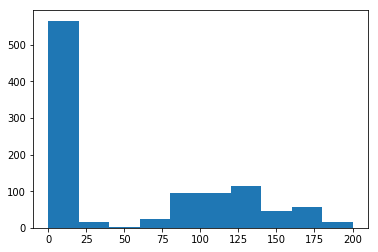

In [14]:
plt.hist(data['ash'])
plt.show()

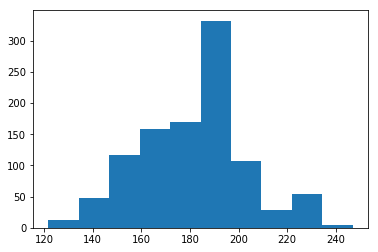

In [15]:
plt.hist(data['water'])
plt.show()

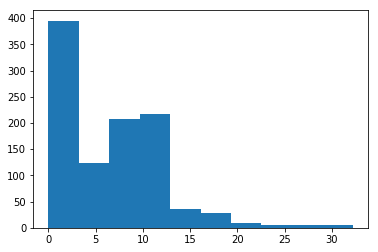

In [16]:
plt.hist(data['superplastic'])
plt.show()

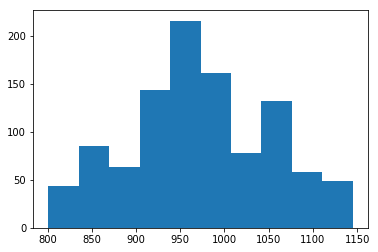

In [17]:
plt.hist(data['coarseagg'])
plt.show()

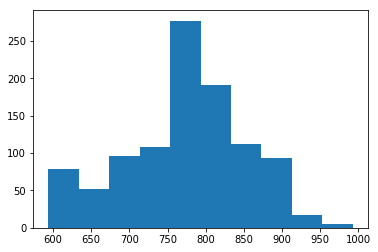

In [18]:
plt.hist(data['fineagg'])
plt.show()

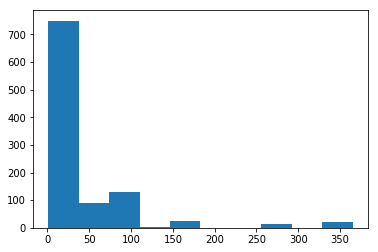

In [19]:
plt.hist(data['age'])
plt.show()

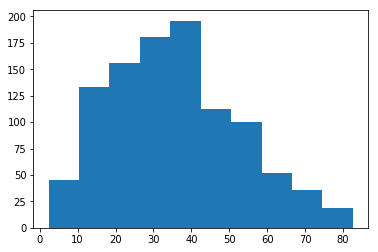

In [20]:
plt.hist(data['strength'])
plt.show()

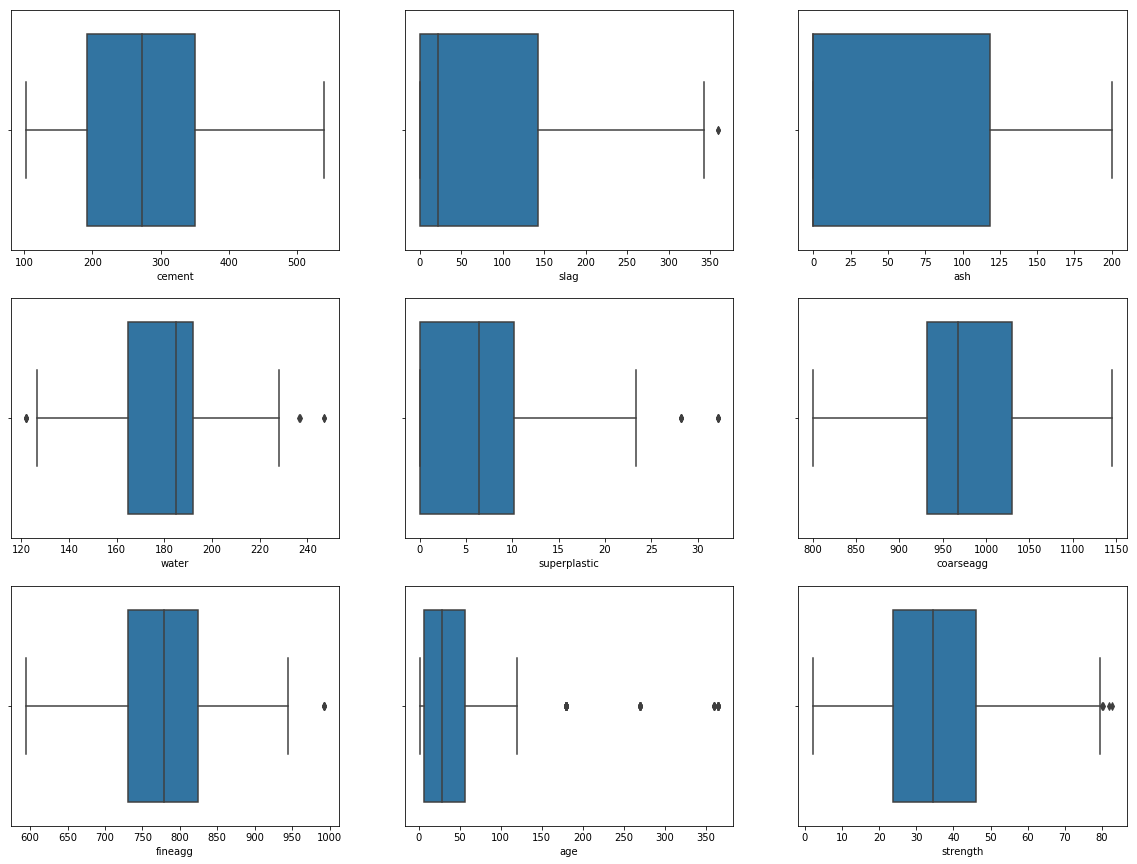

In [21]:
# Data Visualization using boxplot

f,axes=plt.subplots(3,3,figsize=(20,15))
sns.boxplot(data['cement'],ax=axes[0,0])
sns.boxplot(data['slag'],ax=axes[0,1])
sns.boxplot(data['ash'],ax=axes[0,2])
sns.boxplot(data['water'],ax=axes[1,0])
sns.boxplot(data['superplastic'],ax=axes[1,1])
sns.boxplot(data['coarseagg'],ax=axes[1,2])
sns.boxplot(data['fineagg'],ax=axes[2,0])
sns.boxplot(data['age'],ax=axes[2,1])
sns.boxplot(data['strength'],ax=axes[2,2])
plt.show()

Observations:

1. The min value for the attribute cement is 102 and max value is 540, most of the data lies between 100 and 400.
2. The min value for the attribute slag is 0 and max value is 359.4, majority of data lies between 0 to 45.
3. The min value for the attribute ash is 0 and max value is 200.1, majority of data lies between 0 to 22
4. The min value for the attribute water is 121.80 and max value is 247, majority of data lies between 150 to 200.
5. The min value for the attribute superplastic is 0 and max value is 32.2, majority of data lies between 0 to 3 and 7 to 12.
6. The min value for the attribute coarseagg is 801 and max value is 1145, majority of data lies between 900 to 1000.
7. The min value for the attribute fineagg is 594 and max value is 992.6, majority of data lies between 740 to 840.
8. The min value for the attribute age is 1 and max value is 365, majority of data lies between 1 to 40.
9. The min value for the attribute strength is 2.33 and max value is 82.6, majority of data lies between 12 to 45.

In [22]:
# We see some outliers int the columns like slag, superplastic etc. which needs to be handled
# Replacing the outliers randomly between 25~75 percentile of values
# Handling outliers for 'slag'
import random

for i in range(len(data['slag'])):
    if data.loc[i,'slag']>300:
        data.loc[i,'slag']= random.randrange(0, 143)

In [23]:
# Handling outliers for 'water'
for i in range(len(data['water'])):
    if data.loc[i,'water']>230:
        data.loc[i,'water']= random.randrange(165, 192)

In [24]:
# Handling outliers for 'water' contd.
for i in range(len(data['water'])):
    if data.loc[i,'water']<125:
        data.loc[i,'water']= random.randrange(165, 192)

In [25]:
# Handling outliers for 'superplastic'
for i in range(len(data['superplastic'])):
    if data.loc[i,'superplastic']>25:
        data.loc[i,'superplastic']= random.randrange(0, 10)

In [26]:
# Handling outliers for 'fineagg'
for i in range(len(data['fineagg'])):
    if data.loc[i,'fineagg']>950:
        data.loc[i,'fineagg']= random.randrange(731, 824)

In [27]:
# Handling outliers for 'age'
for i in range(len(data['age'])):
    if data.loc[i,'age']>60:
        data.loc[i,'age']= random.randrange(7, 56)

In [28]:
# Handling outliers for 'strength'
for i in range(len(data['strength'])):
    if data.loc[i,'strength']>80:
        data.loc[i,'strength']= random.randrange(23, 46)

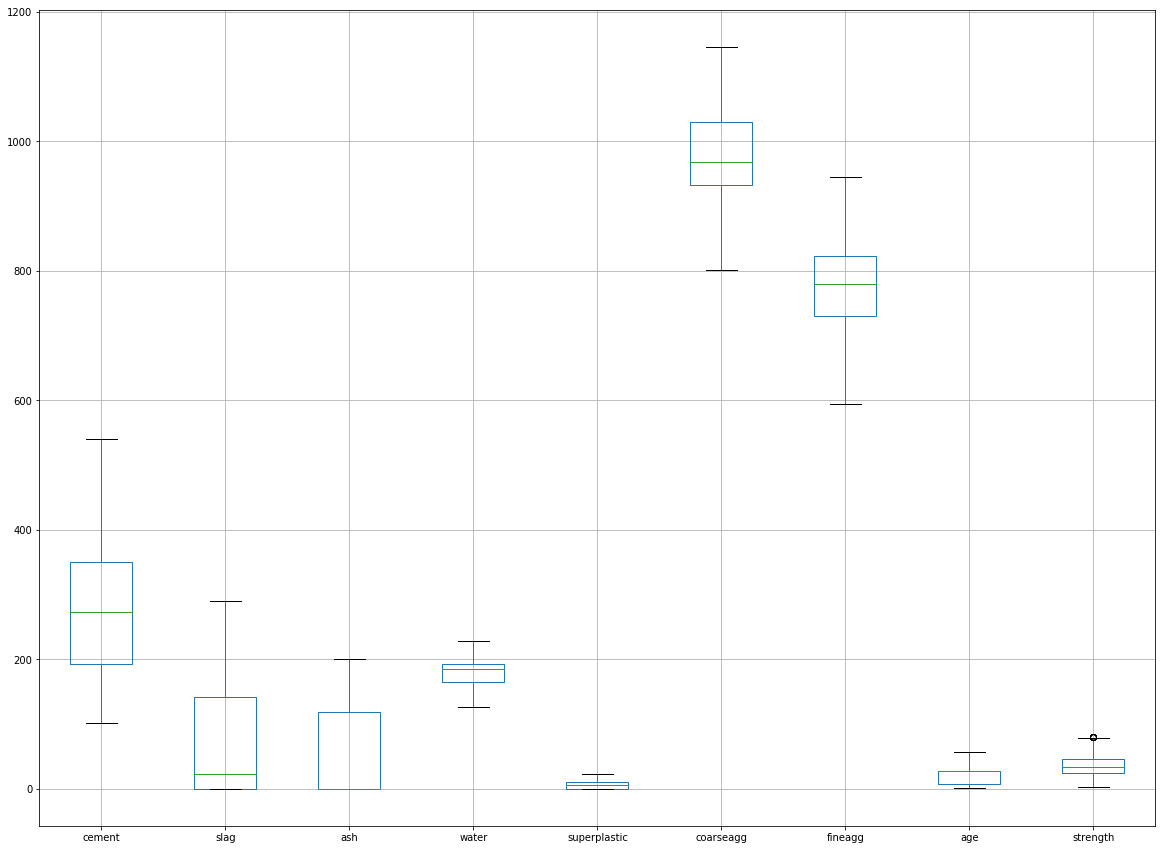

In [29]:
data.boxplot(column=['cement','slag','ash','water','superplastic','coarseagg','fineagg','age','strength'],figsize=(20,15))

In [30]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( 
          data[['cement', 'age','ash','water','coarseagg','fineagg','superplastic','slag']], data['strength'], test_size = 0.3, random_state = 7) 

In [31]:
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (721, 8)
Training Labels Shape: (721,)
Testing Features Shape: (309, 8)
Testing Labels Shape: (309,)


In [32]:
#Cross validation
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

cross_val = []
depths = range(1,10)

test = []
for i in depths:

    dt = tree.DecisionTreeRegressor(max_depth=i, min_samples_split=3, min_samples_leaf=2)
    dt.fit(X_train, y_train)
    # Perform 3-fold cross validation 
    scores = cross_val_score(estimator=dt, X=X_train, y=y_train, cv=5, n_jobs=4, scoring='r2')
    print(scores)
    cross_val.append(scores.mean())
    predictions = dt.predict(X_test)
    test.append(r2_score(y_test, predictions))

[ 0.15095667  0.12361576  0.22996037  0.18750212  0.17378252]
[ 0.53901419  0.30417702  0.5437443   0.45582993  0.42743204]
[ 0.62013463  0.53942249  0.63601765  0.55463771  0.54055991]
[ 0.71968915  0.59716869  0.7207001   0.62680063  0.66918555]
[ 0.75202329  0.6538036   0.7535353   0.68205262  0.75215998]
[ 0.7657393   0.70257     0.79657515  0.68165055  0.77724613]
[ 0.79439763  0.72696965  0.81790428  0.68671498  0.77902816]
[ 0.7976038   0.73782871  0.82083511  0.68101816  0.78671252]
[ 0.76268598  0.73603052  0.83456778  0.66800678  0.78697171]


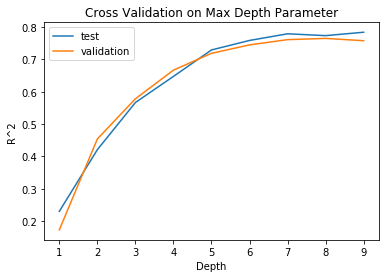

In [33]:
plt.plot(range(1,10),test, label='test')
plt.plot(range(1,10),cross_val, label = 'validation')
plt.title('Cross Validation on Max Depth Parameter')
plt.xlabel('Depth')
plt.ylabel('R^2')
plt.legend()

In [34]:
def rmse(y_pred, y): #rmse formula
    return round(np.sqrt((y_pred - y)**2).mean(), 2)

In [35]:
dt = tree.DecisionTreeRegressor(max_depth=2, min_samples_split=2, min_samples_leaf=2)
dt = dt.fit(X_train, y_train)
predictions = dt.predict(X_test)
print('Root Mean Square Error on the test data: {}'.format(rmse(predictions, y_test)))

Root Mean Square Error on the test data: 9.76


In [36]:
data.columns

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'],
      dtype='object')

In [37]:
#train test split
X_train, X_test, y_train, y_test = train_test_split( 
          data[['cement', 'slag', 'age','ash', 'superplastic', 'water', 'coarseagg', 'fineagg']], data['strength'], test_size = 0.3, random_state = 7) 

In [38]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint

In [39]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [40]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   57.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  5.3min finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score=True, scoring=None, verbose=2)

In [41]:
print("R Squared of Fandom Forest with tuned parameters with GridSearch: {}".format(round(r2_score(y_test, rf_random.predict(X_test)), 2)))
print("RMSE of Fandom Forest with tuned parameters with GridSearch: {}".format(round(rmse(y_test, rf_random.predict(X_test)), 2)))

R Squared of Fandom Forest with tuned parameters with GridSearch: 0.87
RMSE of Fandom Forest with tuned parameters with GridSearch: 4.22
